<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_12_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python dan Scikit-Learn
import sys, sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import TensorFlow dan pastikan versinya
import tensorflow as tf
from tensorflow import keras
from packaging import version
assert version.parse(tf.__version__) >= version.parse("2.4")

# Import umum
import numpy as np, os
np.random.seed(42)
tf.random.set_seed(42)

# Visualisasi
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup penyimpanan gambar
IMAGES_PATH = os.path.join(".", "images", "deep")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout: plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Custom Layers

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from packaging import version

assert version.parse(tf.__version__) >= version.parse("2.4")
np.random.seed(42)
tf.random.set_seed(42)

# Dataset dan preprocessing (gunakan dataset dummy regresi jika belum ada)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = [X.shape[1]]

# Custom Layer: Add Gaussian Noise
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

# Bangun model dengan custom layer
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    AddGaussianNoise(1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

# Training
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

# Evaluasi
test_loss = model.evaluate(X_test_scaled, y_test)

# Ringkasan Hasil
final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 14293.8975 - val_loss: 13919.9102
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 14230.3457 - val_loss: 13836.7754
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 14138.2373 - val_loss: 13748.8447
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 14061.3613 - val_loss: 13658.6787
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13967.6475 - val_loss: 13559.3730
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13862.2588 - val_loss: 13449.9297
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13768.8506 - val_loss: 13334.9434
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 13639.5840 - val_loss: 13211.9346
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 13558.8467 - val_loss: 13077.9951
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 13411.9180 - val_loss: 12928.6338
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13288.5215

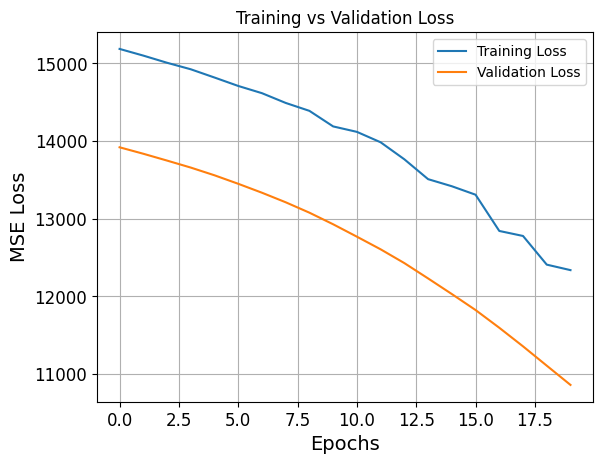

In [3]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

## Custom Models

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from packaging import version
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

assert version.parse(tf.__version__) >= version.parse("2.4")

# Dataset dummy
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_new_scaled = X_test_scaled

# Custom Residual Block
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

# Model Residual Regressor
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=[X.shape[1]]),
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

# Training dengan validation
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

# Evaluasi
test_loss = model.evaluate(X_test_scaled, y_test)

# Prediksi
y_pred = model.predict(X_new_scaled)

# Ringkasan hasil
final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 16765.8379 - val_loss: 8566.4834
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8761.7207 - val_loss: 1724.1271
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1734.5699 - val_loss: 925.7272
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 977.3683 - val_loss: 637.5720
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 685.9924 - val_loss: 461.8980
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 487.5880 - val_loss: 338.5300
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 350.1888 - val_loss: 245.1868
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 247.7221 - val_loss: 182.7597
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 177.3015 - val_loss: 145.5093
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132.1799 - val_loss: 119.0720
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.1750 - val_loss: 99.5172
Epoch 12/20
22/22 ━━━━━━

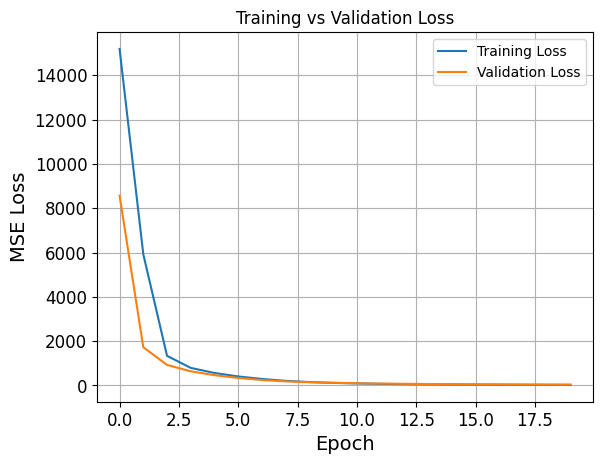

In [5]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

## Custom Training Loops

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset dummy regresi
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Model sederhana dengan L2 regularization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

# Hyperparameters dan setup
n_epochs = 20
batch_size = 32
n_steps = len(X_train_scaled) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.MeanSquaredError()

# Progress bar + logging
from tqdm.notebook import trange
from collections import OrderedDict

train_loss_log, train_mae_log = [], []

for epoch in trange(1, n_epochs + 1, desc="All Epochs"):
    mean_loss = keras.metrics.Mean()
    mean_mae = keras.metrics.MeanAbsoluteError()

    for step in trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}", leave=False):
        idx = np.random.randint(len(X_train_scaled), size=batch_size)
        X_batch, y_batch = X_train_scaled[idx], y_train[idx]

        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        mean_loss.update_state(loss)
        mean_mae.update_state(y_batch, y_pred)

    # Logging per epoch
    train_loss_log.append(mean_loss.result().numpy())
    train_mae_log.append(mean_mae.result().numpy())

# Kompilasi model agar bisa dievaluasi dengan evaluate()
model.compile(loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

# Evaluasi pada validation dan test set
val_loss, val_mae = model.evaluate(X_valid_scaled, y_valid, verbose=0)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

# Hasil evaluasi
print("\n--- Evaluation ---")
print(f"Final Training Loss (MSE): {train_loss_log[-1]:.4f}")
print(f"Final Training MAE: {train_mae_log[-1]:.4f}")
print(f"Validation Loss (MSE): {val_loss:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")

All Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 2/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 3/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 4/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 5/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 6/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 7/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 8/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 9/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 10/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 11/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 12/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 13/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 14/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 15/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 16/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 17/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 18/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 19/20:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 20/20:   0%|          | 0/21 [00:00<?, ?it/s]


--- Evaluation ---
Final Training Loss (MSE): 168.8867
Final Training MAE: 9.3364
Validation Loss (MSE): 158.7001
Test Loss (MSE): 150.3506


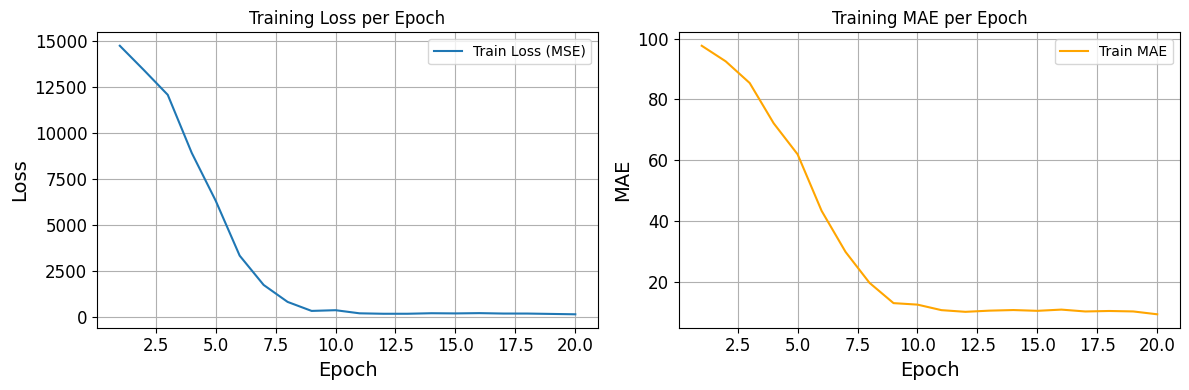

In [7]:
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_log, label="Train Loss (MSE)")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae_log, label="Train MAE", color='orange')
plt.title("Training MAE per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# **Proses Manual Training Loop dengan Keras**

## Tahapan Utama
### 1. Dataset dan Pra-pemrosesan
* Data dibuat menggunakan fungsi make_regression() dari scikit-learn.

* Dataset dibagi menjadi tiga bagian: training, validasi, dan test set.

* Fitur-fitur distandarisasi menggunakan StandardScaler untuk memastikan skala yang seragam.

### 2. Arsitektur Model
* Model disusun menggunakan Sequential API, terdiri dari dua lapisan Dense.

* Lapisan pertama menggunakan fungsi aktivasi ELU dan inisialisasi bobot he_normal.

* Regularisasi L2 (l2(0.05)) diterapkan untuk mencegah overfitting.

* Model tidak langsung dikompilasi, karena proses pelatihan akan dilakukan secara manual.

### 3. Loop Pelatihan Manual (Custom Training Loop)
* Proses pelatihan dikontrol menggunakan for loop, baik pada level batch maupun epoch.

* Fungsi tf.GradientTape() digunakan untuk menghitung dan menerapkan gradien secara eksplisit.

* Metrik tf.keras.metrics.Mean() dan MeanAbsoluteError() digunakan untuk memantau performa selama pelatihan.

* Library tqdm digunakan untuk menampilkan progress bar yang interaktif.

### 4. Evaluasi Model
* Setelah proses pelatihan selesai, model dikompilasi ulang untuk proses evaluasi menggunakan fungsi loss dan metrik standar.

* Evaluasi dilakukan terhadap validation set dan test set untuk mengukur kemampuan generalisasi.

### 5. Visualisasi
* Learning curve divisualisasikan dengan plot nilai Loss (MSE) dan MAE per epoch.

* Grafik ini membantu dalam memantau stabilitas dan konvergensi model selama pelatihan.

# **Kesimpulan**
* Model berhasil dilatih dengan pendekatan training loop manual dan menunjukkan performa yang konsisten.

* Nilai Training Loss (MSE) dan MAE menurun secara bertahap seiring bertambahnya jumlah epoch, menunjukkan proses pelatihan berjalan efektif.

* Hasil evaluasi pada validation set dan test set menunjukkan bahwa model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik.

* Pendekatan ini memberikan fleksibilitas tinggi, sangat berguna untuk eksperimen lanjutan seperti penerapan regularisasi khusus, pengaturan learning rate scheduler, atau teknik optimisasi kustom lainnya.